## **Voice Gender Recognition Using CNN**




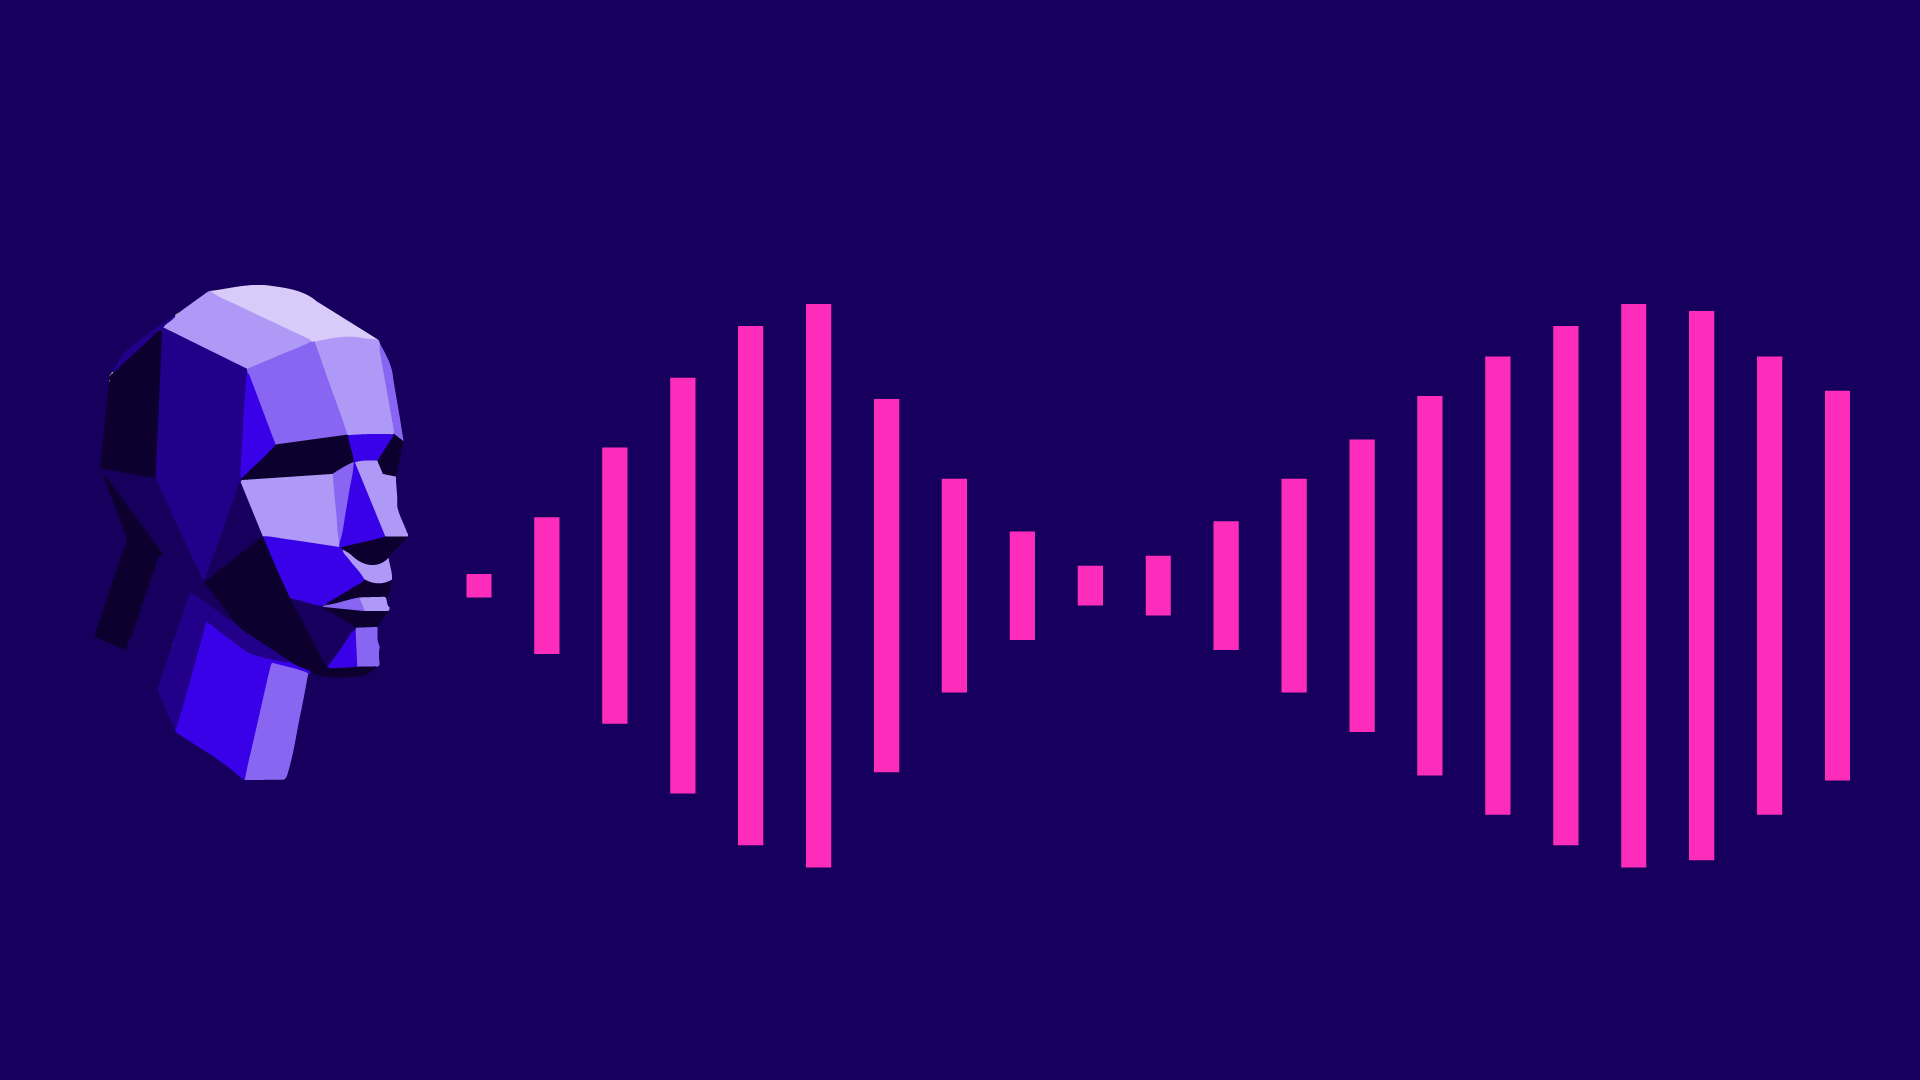

## **Description** **of** **Dataset** 



The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference 
between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female

In [1]:
!pip3 install h5py

In [2]:
!pip install transformers
!pip install gradio
!pip install --upgrade --no-cache-dir gdown

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gradio as gr
%matplotlib inline
plt.rcParams.update({'font.size': 20})

## Loading Data 

In [5]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\NN PROJECT\\voice.csv')

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

## Dataframe Shape

In [8]:
df.shape

(3168, 21)

In [9]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Checking For Null Values 

In [11]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [12]:
df.duplicated().sum()

2

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## Apply One Hot Encoding on 'Label' column

In [16]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [17]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [18]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


# Removing Outliers 

In [19]:
# checking number of outliers in each feature "continous feature"

x = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','dfrange','modindx','label']  

def outliers(data_out, drop = False):

    for each_x in data_out.columns:

        x_data = data_out[each_x]

        Q1 = np.percentile(x_data, 25.) # 25th percentile of the data of the given feature

        Q3 = np.percentile(x_data, 75.) # 75th percentile of the data of the given feature

        IQR = Q3-Q1                     #Interquartile Range

        outlier_step = IQR * 1.5       
        outliers = x_data[~((x_data >= Q1 - outlier_step) & (x_data <= Q3 + outlier_step))].index.tolist()  

        if not drop:

            print('For the feature {}, Number of Outliers is {}'.format(each_x, len(outliers)))

        if drop:

            df.drop(outliers, inplace = True, errors = 'ignore')

            print('Outliers from {} feature removed'.format(each_x))



# outliers(df[x],drop=True)

In [20]:
outliers(df[x],drop=True)

Outliers from meanfreq feature removed
Outliers from sd feature removed
Outliers from median feature removed
Outliers from Q25 feature removed
Outliers from Q75 feature removed
Outliers from IQR feature removed
Outliers from skew feature removed
Outliers from kurt feature removed
Outliers from sp.ent feature removed
Outliers from sfm feature removed
Outliers from mode feature removed
Outliers from centroid feature removed
Outliers from meanfun feature removed
Outliers from minfun feature removed
Outliers from maxfun feature removed
Outliers from meandom feature removed
Outliers from mindom feature removed
Outliers from dfrange feature removed
Outliers from modindx feature removed
Outliers from label feature removed


In [21]:
df.shape

(2146, 21)

In [22]:
len(df)

2146

## Data Virtulization 

1    1080
0    1066
Name: label, dtype: int64


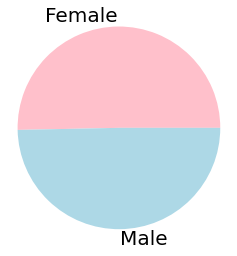

In [23]:
colors = ['pink', 'Lightblue']
plt.figure(figsize = [4, 4]) 
df_p = df[df.columns[-1]]
plt.pie(df_p.value_counts(),colors=colors , labels = ['Female' , 'Male'])
plt.axis('equal')
print(df['label'].value_counts())

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


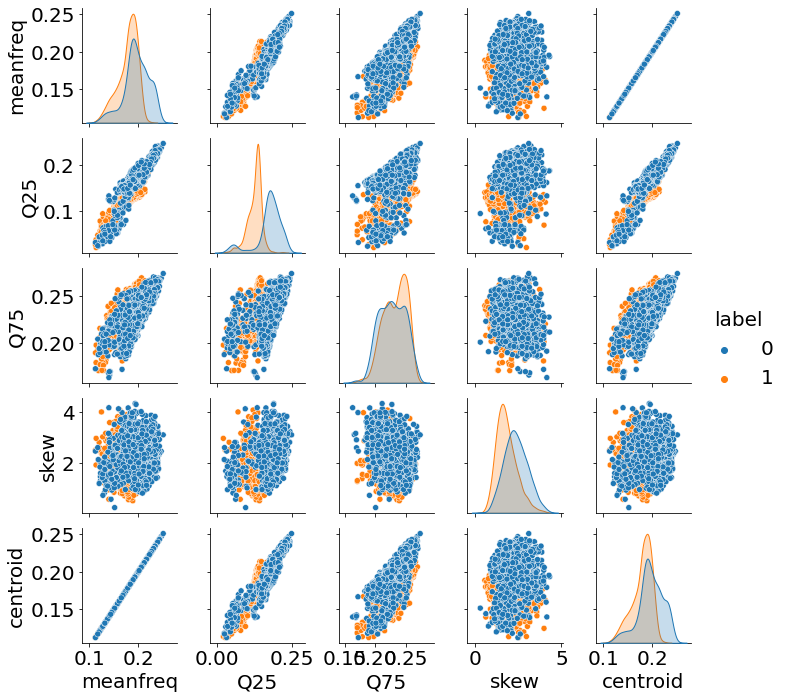

In [24]:
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)
plt.show()

<AxesSubplot:title={'center':'meanfreq'}, xlabel='label'>

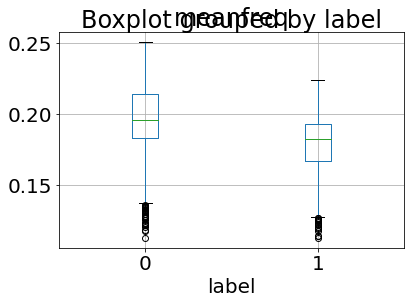

In [25]:
df.boxplot(column= 'meanfreq', by='label',grid='false')

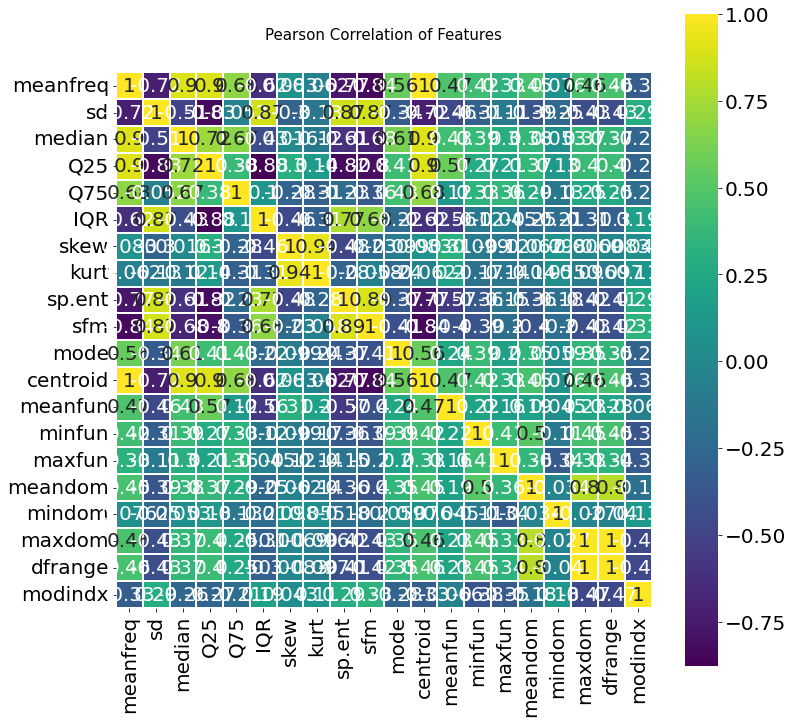

In [26]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [27]:
y = df['label'].copy()
X = df.drop('label', axis=1).copy()

## Standralization 

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X

array([[-1.43889446,  1.09335654, -1.20756623, ..., -1.75954451,
        -1.74908837,  1.48373805],
       [-2.08596204,  1.55093963, -2.3509158 , ..., -0.08022647,
        -0.07055475,  0.91225902],
       [-2.17972108,  1.57765543, -2.54172157, ..., -1.02117769,
        -1.01106644, -0.31049365],
       ...,
       [-1.80733912,  2.63399107, -0.32592797, ..., -0.94920692,
        -0.93912929,  0.71342625],
       [-1.74296504,  2.29772844, -0.28325391, ..., -0.72529784,
        -0.71532481,  2.42356761],
       [-0.86521384,  2.44440944, -0.3494879 , ..., -1.7622101 ,
        -1.75175271,  2.9972922 ]])

In [30]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23472\2013437939.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')


In [31]:
X.shape

(2146, 5, 5, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)    # Validation 

In [33]:
# split dataset size
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1502, 5, 5, 1) (1502,)
(644, 5, 5, 1) (644,)


In [34]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0     

In [36]:
model.save_weights('my_model_weights.h5')

In [37]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.6583 - accuracy: 0.6245 - auc: 0.7600 - val_loss: 0.6155 - val_accuracy: 0.7741 - val_auc: 0.8372
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.7818 - auc: 0.8596 - val_loss: 0.5037 - val_accuracy: 0.8073 - val_auc: 0.8821
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8185 - auc: 0.8930 - val_loss: 0.4079 - val_accuracy: 0.8704 - val_auc: 0.9220
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3780 - accuracy: 0.8468 - auc: 0.9302 - val_loss: 0.3497 - val_accuracy: 0.8771 - val_auc: 0.9371
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.8718 - auc: 0.9478 - val_loss: 0.3153 - val_accuracy: 0.8904 - val_auc: 0.9433
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.8893 - auc: 0.9527 - val_loss: 0.2938 - 

In [38]:
model.evaluate(X_test, y_test,verbose = 1)

21/21 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9348 - auc: 0.9815


[0.17268460988998413, 0.9347826242446899, 0.9815323352813721]

In [39]:
# Print the accuracy
accuracy = history.history['accuracy'][-1]
print(f"Accuracy: {accuracy}")

Accuracy: 0.9583680033683777


In [40]:
from scipy.io.wavfile import read

In [41]:
model.load_weights('my_model_weights.h5')

In [42]:
def predict_gender(audio_file):
    # Load the audio file
    sample_rate, audio_data = read(Untitled.wav)

    # Preprocess the audio data to extract the relevant features
    # and transform it into a format that can be passed to the CNN model
    # For example, you could use a Mel spectrogram or MFCCs as features
    # and reshape the data to match the input shape of the CNN model
    
    # Make the gender prediction using the pre-trained CNN model
    prediction = model.predict(features)
    gender = encoder.inverse_transform(prediction.argmax(axis=-1))[0]
    
    # Return the predicted gender
    return gender

# Define the input and output interfaces
inputs = gr.inputs.Audio(label="Audio file")
outputs = gr.outputs.Label(label="Gender")

# Create the Gradio app and launch it
app = gr.Interface(fn=predict_gender, inputs=inputs, outputs=outputs)
app.launch()

c:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:321: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Lenovo\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [43]:
df.shape

(2146, 21)

## Librosa

librosa is a Python package designed for music and sound analysis. It provides powerful tools for processing and analyzing audio signals, including functions for loading and transforming audio data, and for extracting features such as spectrograms, MFCCs, and chroma features. The library is particularly useful for tasks such as genre classification, music tagging, and speech recognition. librosa is open source and can be installed using pip

In [24]:
!pip install librosa
!pip install scipy
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy


In [51]:
pip install numpy==1.21


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.0 which is incompatible.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [52]:
pip install --upgrade librosa

Note: you may need to restart the kernel to use updated packages.


In [47]:
import librosa
import scipy

In [59]:
pip install --upgrade numba

  Using cached numba-0.57.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.40.0-cp39-cp39-win_amd64.whl (27.7 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [18]:
import librosa
from IPython.display import Audio
import numpy as np


In [12]:
sr = 22050

y_sweep = librosa.chirp(fmin=librosa.note_to_hz('C3'),
                        fmax=librosa.note_to_hz('C5'),
                        sr=sr,
                        duration=1)

Audio(data=y_sweep, rate=sr)

In [21]:
import numpy as np
from scipy.io.wavfile import write
# Sample rate (in Hz)
sample_rate = 44100

# Duration of the audio (in seconds)
duration = 5

# Frequency of the tone (in Hz)
frequency = 440

# Generate the audio samples
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
audio_data = np.sin(2 * np.pi * frequency * t)

# Scale the audio samples to the appropriate range (-32768 to 32767 for 16-bit signed PCM)
audio_data = np.int16(audio_data * 32767)

# Save the audio to a WAV file
write('test_audio.wav', sample_rate, audio_data)

In [40]:
x, sr = librosa.load('test_audio.wav')

In [41]:
freqs = np.fft.fftfreq(x.size)
freqs

array([ 0.00000000e+00,  9.07029478e-06,  1.81405896e-05, ...,
       -2.72108844e-05, -1.81405896e-05, -9.07029478e-06])

In [42]:
def describe_freq(freqs):
    mean = np.mean(freqs)
    std = np.std(freqs) 
    maxv = np.amax(freqs) 
    minv = np.amin(freqs) 
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)
    
    return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

In [45]:
import scipy
features = describe_freq(freqs)

In [46]:
features

[-4.535147392276328e-06,
 0.2886751345829382,
 0.4999909297052154,
 -0.5,
 -4.535147392290249e-06,
 3.743890618441445e-18,
 -1.2000000001974482,
 -0.25000226757369615,
 0.24999319727891156,
 -0.5,
 0.4999954648526077]

In [51]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\NN PROJECT\\voice.csv')
df.iloc[1,]

meanfreq      0.066009
sd             0.06731
median        0.040229
Q25           0.019414
Q75           0.092666
IQR           0.073252
skew         22.423285
kurt        634.613855
sp.ent        0.892193
sfm           0.513724
mode               0.0
centroid      0.066009
meanfun       0.107937
minfun        0.015826
maxfun            0.25
meandom       0.009014
mindom        0.007812
maxdom        0.054688
dfrange       0.046875
modindx       0.052632
label             male
Name: 1, dtype: object

In [52]:
f0 = librosa.yin(x, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'))
print(f0.shape)
print(f0)

(216,)
[749.88201794 440.600292   440.08548422 440.08689417 440.08426026
 440.08746783 440.08424877 440.08698117 440.0852416  440.08565078
 440.08658351 440.08444968 440.08743408 440.08411627 440.08718316
 440.08492811 440.08598854 440.08623609 440.08471169 440.08728024
 440.08409098 440.08736111 440.08462173 440.08635327 440.0859137
 440.08499701 440.08708803 440.08413886 440.08743972 440.08437185
 440.08672453 440.08551335 440.08532157 440.08683909 440.08425325
 440.08747564 440.08420591 440.08701572 440.08517301 440.08568948
 440.08653584 440.08449586 440.08743031 440.0841307  440.08715672
 440.08484422 440.08610446 440.08618989 440.08474344 440.08726217
 440.08408635 440.08737685 440.0845885  440.08646498 440.0858246
 440.08511328 440.08704973 440.08416069 440.08747711 440.08434207
 440.08673396 440.08544619 440.08544045 440.08681855 440.08430528
 440.08746491 440.08420129 440.08702349 440.08511708 440.08579682
 440.08646162 440.08457757 440.08738088 440.08411254 440.08724987
 440.

In [53]:
male_features = df[df['label'] == 1]
female_features = df[df['label'] == 0]

In [54]:
features = list(df.columns)
del features[-1]


In [55]:
print(features)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [56]:
max_male_features = dict()
min_male_features = dict()
mean_male_features = dict()
max_female_features = dict()
min_female_features = dict()
mean_female_features = dict()

In [60]:
max_male_features = {}
min_male_features = {}
mean_male_features = {}
max_female_features = {}
min_female_features = {}
mean_female_features = {}

for i in features:
    if not male_features[i].empty:
        max_male_features[i] = max(male_features[i])
        min_male_features[i] = min(male_features[i])
        mean_male_features[i] = np.mean(male_features[i])
    if not female_features[i].empty:
        max_female_features[i] = max(female_features[i])
        min_female_features[i] = min(female_features[i])
        mean_female_features[i] = np.mean(female_features[i])
    else:
        # Handle the case when the Series is empty
        max_male_features[i] = None
        min_male_features[i] = None
        mean_male_features[i] = None
        max_female_features[i] = None
        min_female_features[i] = None
        mean_female_features[i] = None


In [61]:
new_male_features = pd.DataFrame([max_male_features, min_male_features, mean_male_features])
new_male_features

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [66]:
import plotly.express as px

In [67]:
wide_df = px.data.medals_wide()
wide_fig = px.bar(df, 
    x="label", 
    y=["meanfreq", "median", "sd"],
    barmode = 'group') #Barmode attribute
wide_fig.show()